### 2nd European Conference on Social Networks, June 14-17, 2016, Paris (http://eusn2016.sciencesconf.org/)
## Workshop 12:
# EXTRACTING SOCIAL NETWORKS FROM LITERARY TEXT
# George Orwell's "Animal Farm"
## By Moses Boudourides and Sergios Lenis 
## University of Patras, Greece

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop](https://github.com/mboudour/WordNets/blob/master/EUSN2016_LiteraryTextNetworksWorkshop)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

<p>
**Table of Contents**

[I. Importing the Text & Names of Characters](#I)

[II. Descriptive Statistics of Characters](#II)

[III. The Two-Mode Network of Characters and Sentences](#III)

[IV. The Network of Sententially Co-Occurring Characters](#IV)

[V. Trajectories of Transitions among Sentential Co-Occurrences of Characters](#V)

## Importing Python modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import imp
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
from lightning import Lightning
from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb

# utilsdir='/Users/mosesboudourides/Dropbox/Python Projects/EUSN2016_LiteraryTextNetworksWorkshop/utils/'
utilsdir='/home/mab/Dropbox/Python Projects/utils/'#tools.py'
utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/'#EUSN2016_LiteraryTextNetworksWorkshop/utils/'
%matplotlib inline 
%load_ext autoreload

/home/sergios-len/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# The case of Animal Farm 

<a id='I'></a>
## I. Importing the Text & Names of Characters

In [2]:
filename = 'texts/AnimalFarm.txt'

titlename = "Animal Farm"
central_hero = 'Napoleon'
online_list_of_characters = 'https://en.wikipedia.org/wiki/Agnes_Grey'
nn1 = "Animal Farm selected terms"
nn2 = "Animal Farm Characters"
vname1 = 'vids/AnimalFarm.gif'
vname2 = 'vids/AnimalFarm.mp4'
nn3 = "['Napoleon']"
filename1 = 'S_out_graphs/Animal Farm_graph.graphml'

# https://en.wikipedia.org/wiki/Animal_Farm

list_of_chars=['Old Major','Napoleon','Snowball','Squealer','Minimus','piglets',
               'young pigs','Pinkeye','Mr Jones','Mr Frederick','Mr Pilkington',
               'Mr Whymper','Boxer','Mollie','Clover','Benjamin','Muriel','puppies',
               'Moses','sheep','hens','cows','cat']
dici={i:i for i in list_of_chars}

In [3]:
f = codecs.open(filename, "r", encoding="utf-8").read()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i and number of characters = %i" %(titlename,num_words,num_chars)

blob = TextBlob(f)

ndici={i.lower():k for i,k in dici.items()}
dnici=[(i.split()[0],i.split()[1]) for i in ndici.keys() if len(i.split())>1]

selectedTerms=ndici.keys()

Animal Farm has number of words = 139244 and number of characters = 169854


In [4]:
%autoreload 2

tool= imp.load_source('tools', utilsdir+'tools.py')
# tool= imp.load_source('tools', '/Users/mosesboudourides/Dropbox/Python Projects/utils/tools.py')
# import tools as tool

create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text
create_coo_graph=tool.create_coo_graph

dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,ndici,titlename)
co_graph=create_coo_graph(coccurlist)

dfst.rename(columns={nn1:nn2},inplace=True)
# dfst.rename(columns={"Anne Bronte's Agnes Grey selected terms":"Anne Bronte's Agnes Grey Characters"},inplace=True)
dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

/home/sergios-len/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Animal Farm Characters,Frequencies
12,Napoleon,140.0
6,Snowball,126.0
7,Boxer,94.0
5,Squealer,66.0
1,Clover,44.0
0,Benjamin,32.0
3,Mollie,20.0
8,Muriel,14.0
11,Moses,10.0
9,young pigs,5.0


In [5]:
prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 0
# prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>=cuts]
lp = prot_pol_sub['protagonists'].tolist()
lpn = []
for i in lp:
    for j in i:
        lpn.append(j)
# len(set(lpn))
print "The total number of sentences in %s is %i." %(titlename,len(prot_pol_sub))
# print "The total number of sentences in %s with at least %i characters in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'Lists_of_Characters','#_of_protagonists':'#_of_Characters','polarity':'Polarity','subjectivity':'Subjectivity'},inplace=True)
prot_pol_sub.sort(["#_of_Characters"], ascending=[0]) 
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'Sentence_ID'
ddff.head(50)

The total number of sentences in Animal Farm is 1646.


/home/sergios-len/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Lists_of_Characters,#_of_Characters,Polarity,Subjectivity
Sentence_ID,,,,
0,[],0.0,-0.166667,0.333333
1,[],0.0,0.150000,0.230000
2,[],0.0,0.166667,0.333333
3,[],0.0,0.000000,0.000000
4,[],0.0,0.500000,0.888889
5,[],0.0,0.400000,0.400000
6,[],0.0,-0.500000,1.000000
7,[],0.0,0.133333,0.255556
8,[],0.0,0.400000,0.700000


<a id='II'></a>
## II. Descriptive Statistics of Characters

In [6]:
nddd=ddff[ddff['Polarity'] !=0 ]#& ddff['Subjectivity'] !=0]
nddd=nddd[nddd['Subjectivity'] !=0]
# ddff=nddd
ddff[['#_of_Characters','Polarity','Subjectivity']].describe()

,#_of_Characters,Polarity,Subjectivity
count,1646.000000,1646.000000,1646.000000
mean,0.329891,0.021889,0.339221
std,0.583392,0.242023,0.301548
min,0.000000,-1.000000,0.000000
25%,0.000000,-0.050000,0.000000
50%,0.000000,0.000000,0.337326
75%,1.000000,0.100000,0.525000
max,4.000000,1.000000,1.000000


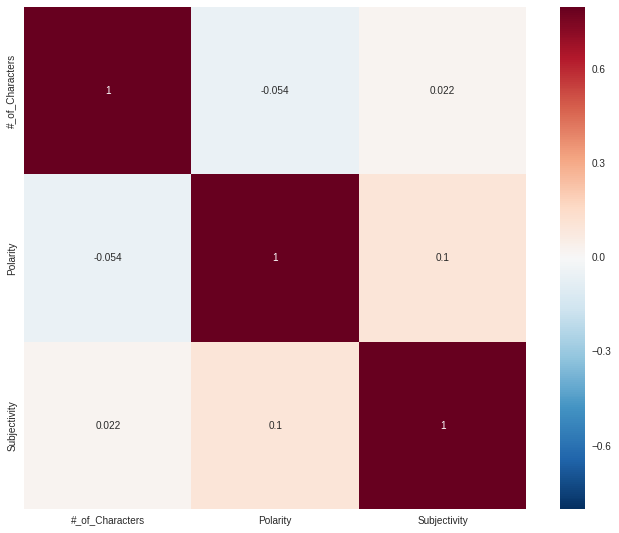

In [7]:
corrmat = ddff.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

/home/sergios-len/.local/lib/python2.7/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


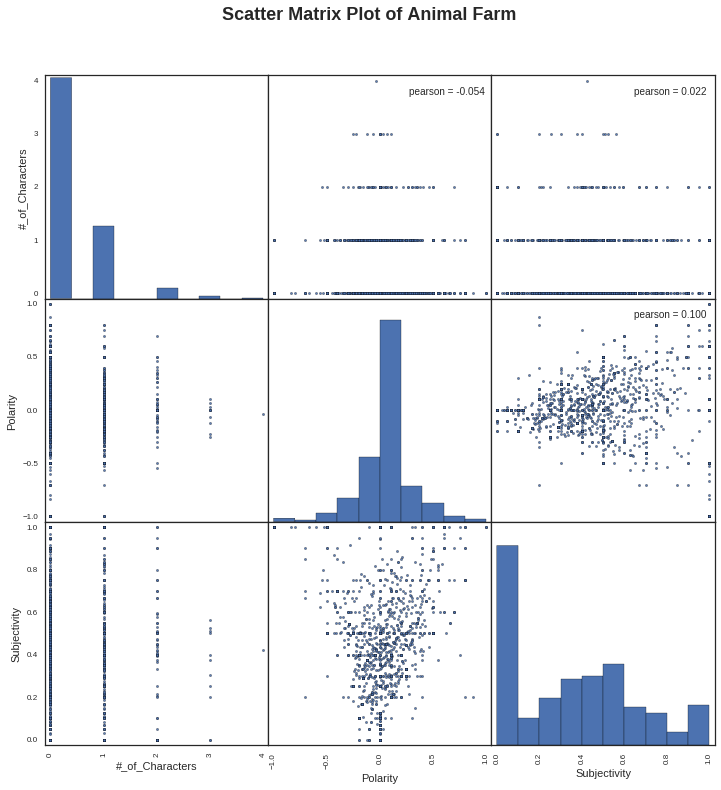

In [8]:
from pandas.tools.plotting import scatter_matrix

ntei='Scatter Matrix Plot of ' + titlename
f, ax = plt.subplots(figsize=(12,12))
# nddd
sss=scatter_matrix(ddff[['#_of_Characters','Polarity','Subjectivity']], alpha=0.9, color='black', diagonal='hist',ax=ax)
plt.suptitle(ntei,fontsize=18,fontweight='bold')
corr = ddff.corr().as_matrix() #nddd.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(sss, k=1)):
    sss[i, j].annotate("pearson = %.3f" %corr[i,j], (0.8, 0.93), xycoords='axes fraction', ha='center', va='center')

### The Histogram of the Number of Characters

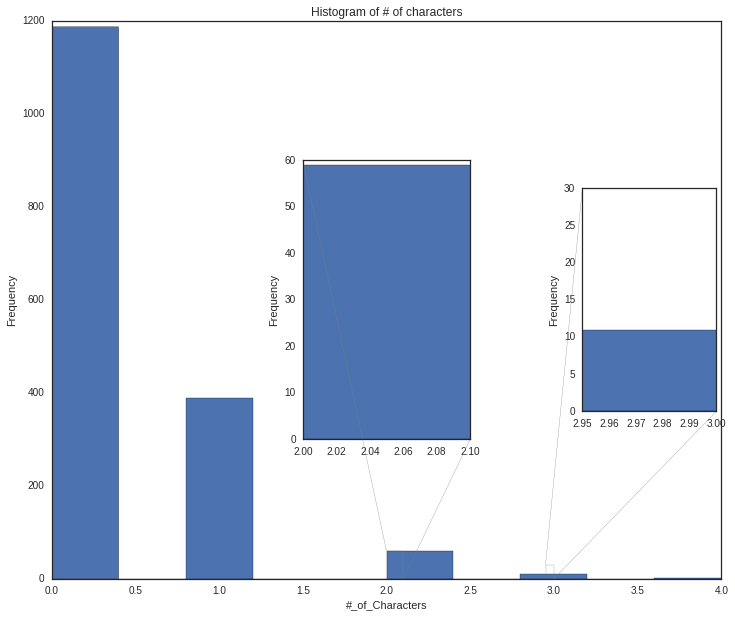

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 16, loc=7)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 2.95, 3., 0, 30
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 10, loc=10)

x1, x2, y1, y2 = 2, 2.1, 0, 60
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

### Various Scatter Plots

In [10]:
x = nddd['Polarity']
y = nddd['Subjectivity']
z = nddd['#_of_Characters']


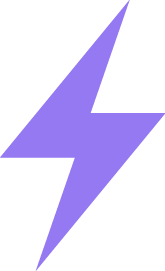

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [11]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [12]:
series = [x,y]
lgn.line(series)

/home/sergios-len/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [13]:
viz = lgn.scatter(x, y, values = z, alpha=0.6, colormap='YlOrRd')
viz

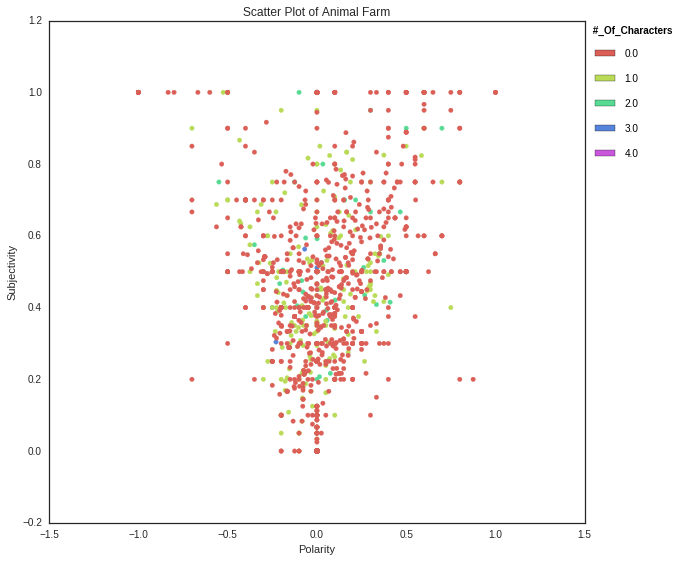

<ggplot: (8760250693277)>

In [14]:
from ggplot import *
import matplotlib as mpl

ntei='Scatter Plot of ' + titlename

p = ggplot(aes(x='Polarity', y='Subjectivity',color='#_of_Characters'), data=ddff) #nddd)
p + geom_point() + ggtitle(ntei) + theme_matplotlib(rc={"figure.figsize": "12, 9"}, matplotlib_defaults=False)

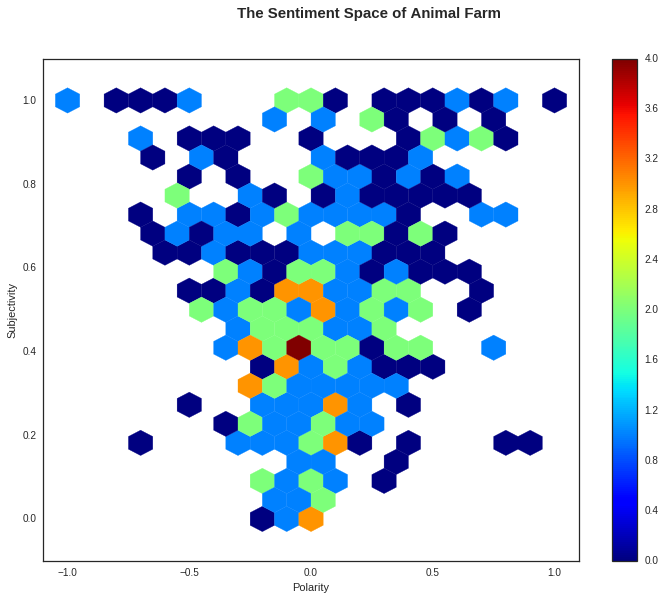

In [15]:
ntei=' The Sentiment Space of ' + titlename
f, ax = plt.subplots(figsize=(12,9))
ddff.plot.hexbin(x='Polarity',y='Subjectivity',gridsize=20,C='#_of_Characters',ax=ax,reduce_C_function=max,cmap='jet')#,title=ntei)
plt.xlim(-1.1, 1.1)
plt.ylim(-.1, 1.1)
plt.suptitle(ntei,fontsize=15,fontweight='bold')

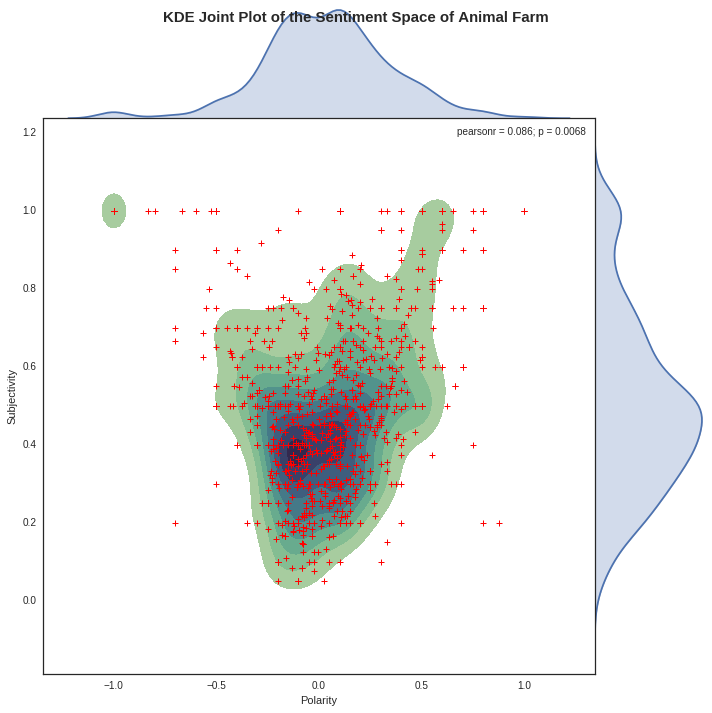

In [16]:
ntei='KDE Joint Plot of the Sentiment Space of ' + titlename
# f, ax = plt.subplots(figsize=(10,10))
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
ggn=sns.jointplot(x='Polarity',y='Subjectivity', data=nddd, kind ="kde",cmap=cmap,space=0, size=10) #, ax=ax) #kind="kde",
# sns.kdeplot(nddd['Polarity'],nddd['Subjectivity'], cmap=cmap, shade=True)
ggn.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
ggn.ax_joint.collections[0].set_alpha(0)
ggn.set_axis_labels("Polarity", "Subjectivity")
plt.suptitle(ntei,fontsize=15,fontweight='bold')

In [17]:
# pols=nddd.Polarity.tolist()
# subj=nddd.Subjectivity.tolist()
# ntei=titlename+' in Sentiment Space'
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-.1, 1.1)
# ax.set_xlabel('Polarity')
# ax.set_ylabel('Subjectivity')   

# # arro=ax.arrow(pols[0], subj[0], pols[1]-pols[0], subj[1]-subj[0], head_width=0.03, head_length=0, fc='b', ec='b',
# #                   length_includes_head=False,
# # # #                  head_starts_at_zero=True
# # # #                  overhang=-.51
# #                  fill=False)

# def animate(i):
#     col=(1.*i/(1.*len(pols)),.5,.5)
#     plt.plot(pols[i],subj[i],'o',color=col, markersize=5)
# #     return arro,

# ani = animation.FuncAnimation(fig, animate, np.arange(0, len(pols)-1), 
#     interval=25, blit=False)

# # ani.save(vname2)#, metadata={'artist':'Guido'})
# ani.save(vname1, writer='imagemagick')
# plt.show()
# print len(pols)

In [18]:
# %%bash
# ffmpeg -f gif -i vids/AnimalFarm.gif vids/AnimalFarm.mp4

In [19]:
import io
import base64
from IPython.display import HTML

video = io.open(vname2, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

# /Users/mosesboudourides/Dropbox/Python Projects/LiteratureNetworks/ArthurConanDoyle/SherlockHolmesStoriesNetwork/

<a id='III'></a>
## III. The Two-Mode Network of Characters and Sentences 

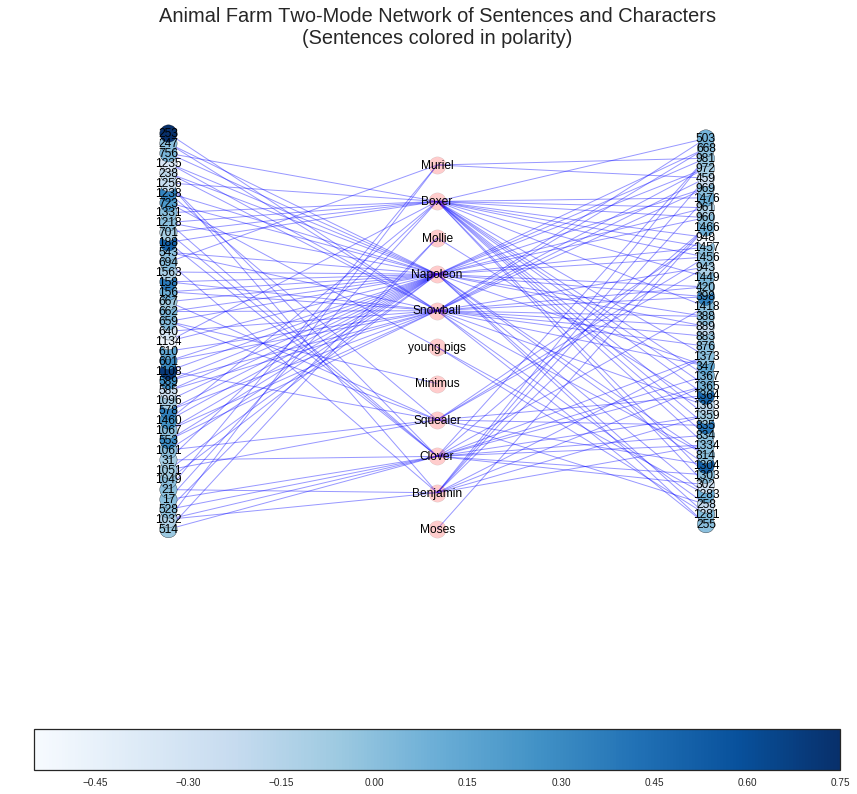

In [20]:
%autoreload 2

# from tools import draw_network_node_color

sstt="%s Two-Mode Network of Sentences and Characters" %titlename
pos=nx.spring_layout(sec_prot)
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]

for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=en*1./len(prot)
possit=tool.draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

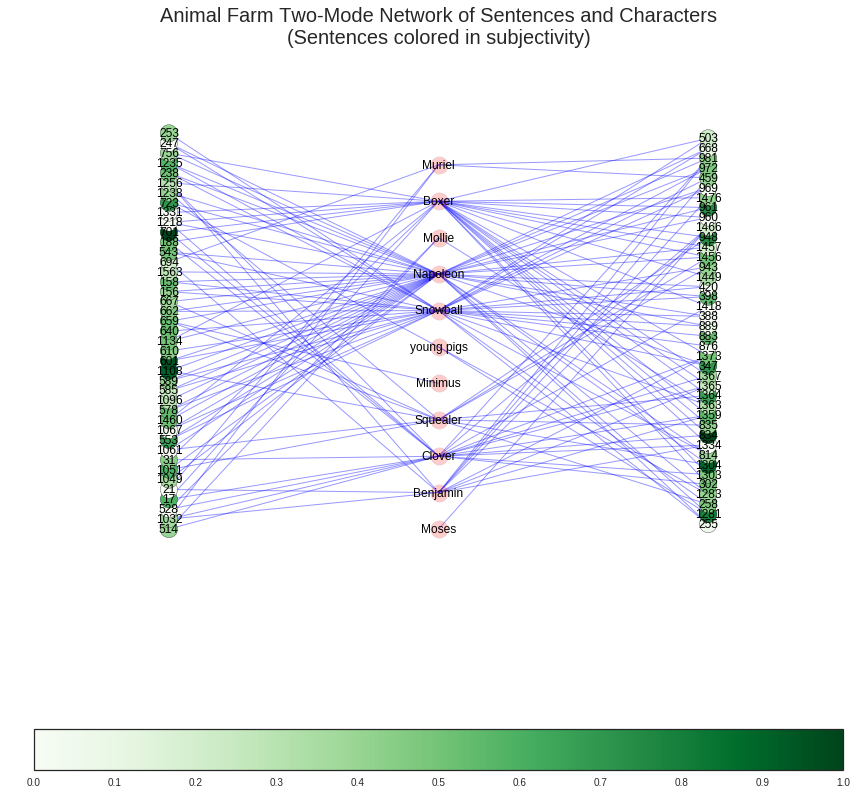

In [21]:
possit=tool.draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
#                                node_col='subjectivity',colormat='Greens')

<a id='IV'></a>
## IV. The Network of Sententially Co-Occurring Characters 

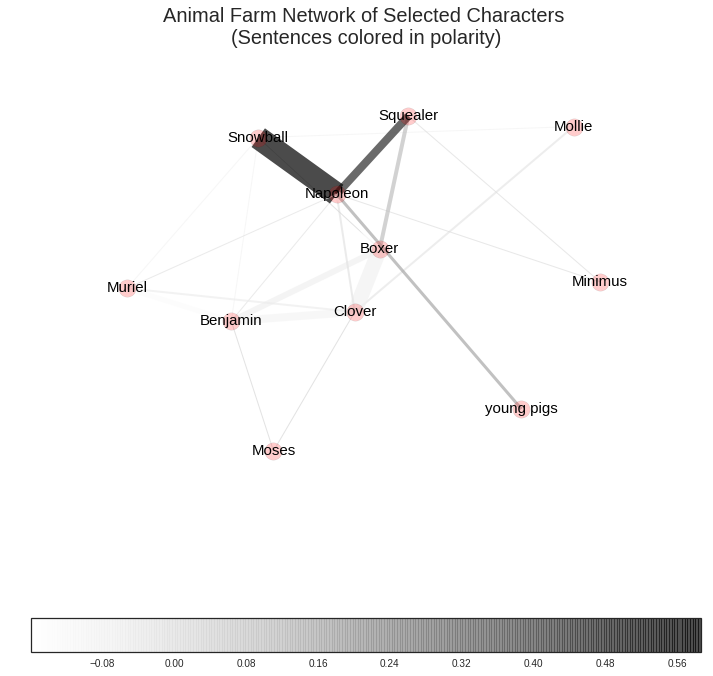

In [22]:
%autoreload 2

# from tools import draw_network, make_graph_from_lists
tool= imp.load_source('tools', utilsdir+'tools.py')

plist = prot_pol_sub['Lists_of_Characters'].tolist()
pplist=prot_pol_sub['Polarity'].tolist()
nplist=prot_pol_sub['#_of_Characters'].tolist()
splist=prot_pol_sub['Subjectivity'].tolist()

G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
posg=nx.spring_layout(G,scale=50,k=0.55,iterations=20)
# posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)

sstt="%s Network of Selected Characters \n(Sentences colored in polarity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues')

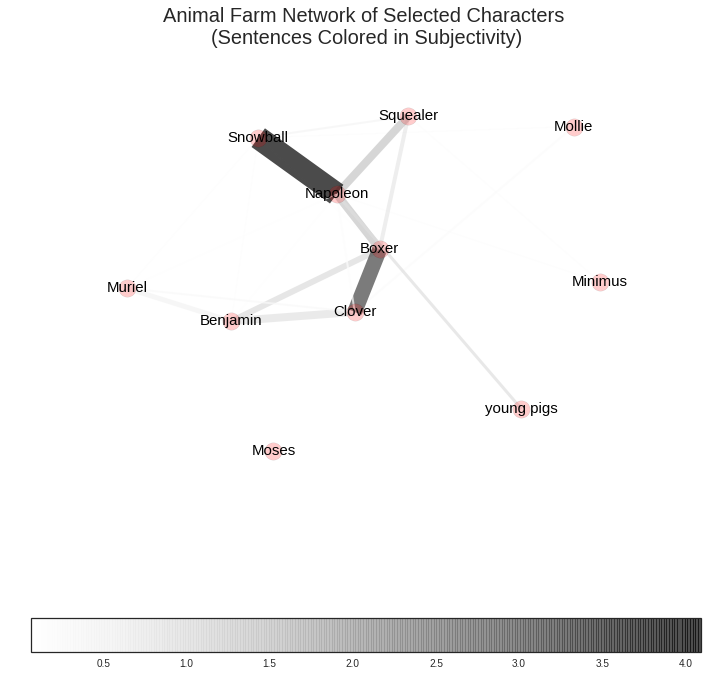

In [23]:
sstt="%s Network of Selected Characters \n(Sentences Colored in Subjectivity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Blues')

### Centralities of Nodes in the Network of Sententially Co-Occurring Characters

/home/sergios-len/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


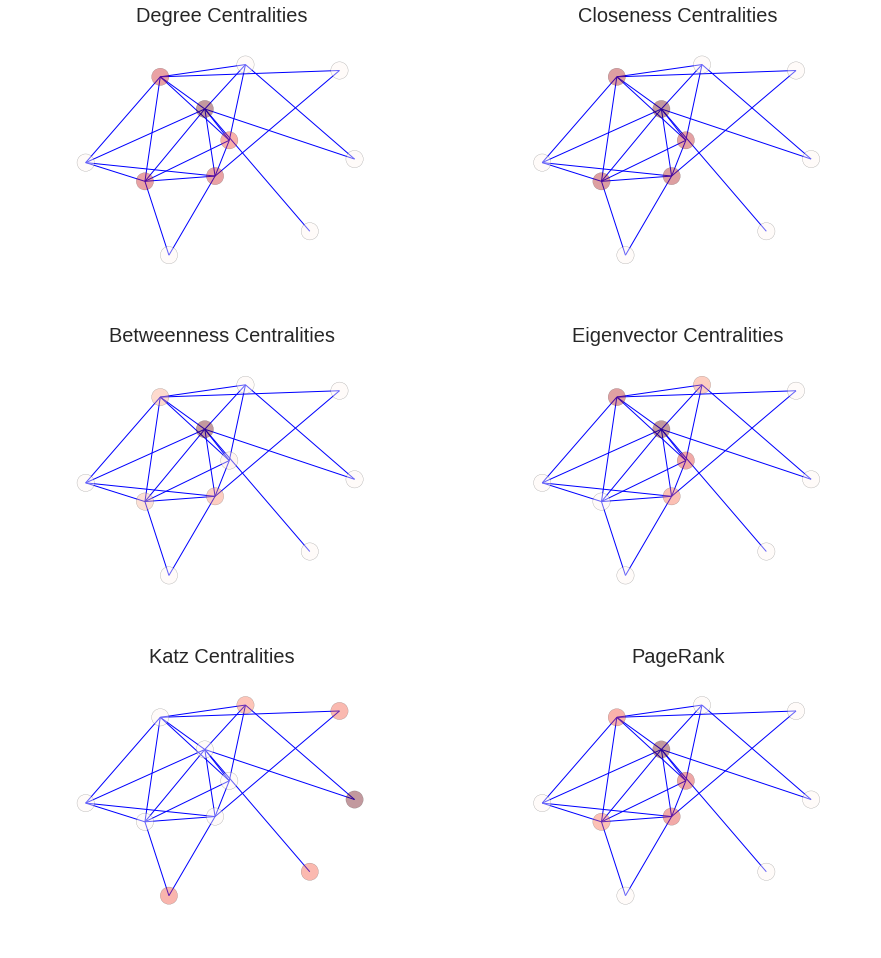

In [24]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Characters 

In [25]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,Benjamin,0.714286,-0.182729,0.101111,0.112846,0.218459,0.6
1,Clover,0.714286,-0.005863,0.155185,0.149283,0.312716,0.6
2,Mollie,0.500000,0.353455,0.004444,0.026043,0.501254,0.2
3,Minimus,0.500000,0.621138,0.000000,0.022064,0.409889,0.2
4,Squealer,0.588235,0.298525,0.029630,0.078447,0.093994,0.4
5,Snowball,0.714286,-0.202359,0.121111,0.134668,0.059909,0.6
6,Boxer,0.666667,0.014521,0.031852,0.156827,0.037586,0.5
7,Muriel,0.625000,-0.246074,0.004444,0.051825,0.017720,0.4
8,young pigs,0.476190,0.351623,0.000000,0.025583,0.248838,0.1
9,Moses,0.476190,0.368956,0.000000,0.022226,0.028271,0.2


### Communities of Nodes in the Network of Sententially Co-Occurring Characters 

Number of communities of Animal Farm Network of Selected Characters 
(Sentences Colored in Subjectivity) = 2
Community partition of Animal Farm Network of Selected Characters 
(Sentences Colored in Subjectivity):
[['Benjamin', 'Clover', 'Mollie', 'Boxer', 'Muriel', 'Moses'], ['Minimus', 'Squealer', 'Snowball', 'young pigs', 'Napoleon']]
Community modularity of Animal Farm Network of Selected Characters 
(Sentences Colored in Subjectivity) = 0.2957


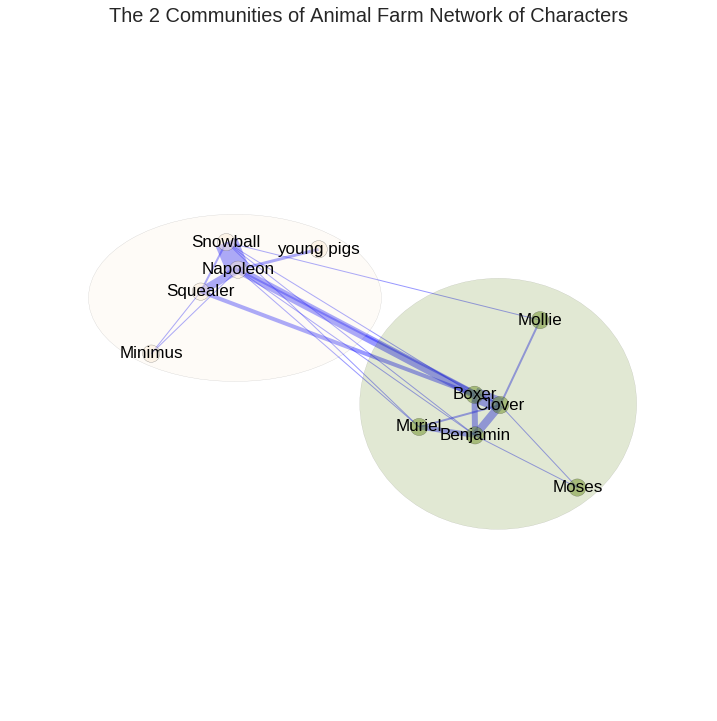

In [26]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(G,sstt)
ndfl=dflines[dflines['#_of_protagonists']>0  ]
# ndfl['#_of_protagonists'].plot.hist()
d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.4
vcc={}
sstta="The %s Communities of %s Network of Characters" %(max(part.values())+1,titlename)#sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

<a id='V'></a>
## V. Trajectories of Transitions among Sentential Co-Occurrences of Characters

### More about Transitions and Trajectories in Temporal Networks:

### http://www.slideshare.net/MosesBoudourides/trajectories1

In [27]:
# %autoreload 2

# !pip install --user pygexf
# !pip install --user pyinterval
# !pip install --user pyinter
# !pip install --user python-igraph
# import trajectories as trj
trj= imp.load_source('trajectories', utilsdir+'trajectories_t.py')

# import create_gexf_year as cgy

### Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters 

['Benjamin', 'Clover', 'Minimus', 'Squealer', 'Snowball', 'Boxer', 'Muriel', 'young pigs']

Statistics of trajectories of first mode vertices

young pigs [['Napoleon__20', 'Napoleon__21'], ['Napoleon__20', 'Napoleon__39'], ['Napoleon__37', 'Napoleon__21'], ['Napoleon__37', 'Napoleon__39']]
1 trajectories analyzed.
['Napoleon']

Statistics of trajectories of second mode vertices

Napoleon [['Snowball__1', 'Boxer__43']]
1 trajectories analyzed.


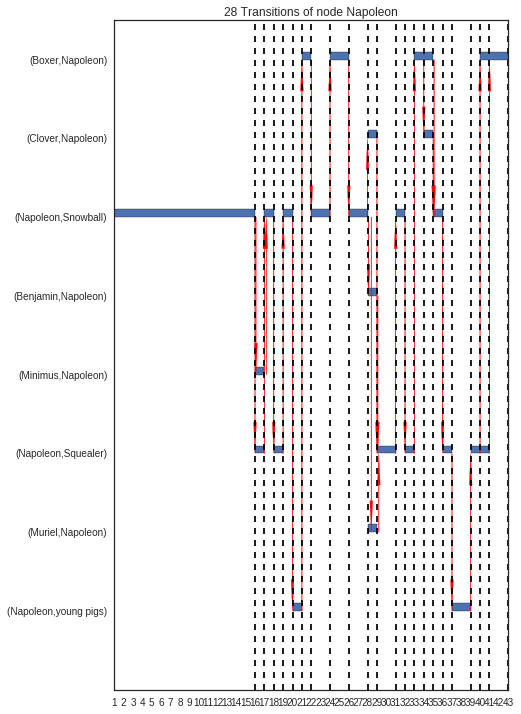

In [28]:
def search_in_list(x):
    l=x['protagonists']
    return central_hero in l
ndfl=dflines[dflines['#_of_protagonists']>1  ]
dialogs=ndfl[ndfl.apply(search_in_list,axis=1) ==True]
protagonists=dialogs.protagonists.tolist()
start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=dialogs.polarity.tolist()
subj=dialogs.subjectivity.tolist()
qq=0
figi=None
search_name=central_hero

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bip(start,end,protagonists,search_name,polarities,subj)
trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters 

In [29]:
trajpdfs[nn3]        #["['Agnes Grey']"]
# trajpdfs["['Sherlock Holmes']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,Benjamin,0.0,8.0,0.0,0.0,8.0,0.0,1.00,0.0,0.0,0.0,20.5,0.0,0.0,20.50,11.000000,51.315789,760.0
1,Clover,0.0,20.0,0.0,0.0,16.0,0.0,1.25,0.0,0.0,0.0,20.8,0.0,0.0,20.75,14.000000,65.526316,1760.0
2,Minimus,0.0,12.0,0.0,0.0,12.0,0.0,1.00,0.0,0.0,0.0,20.5,0.0,0.0,20.50,2.000000,5.131579,222.0
3,Squealer,0.0,132.0,0.0,0.0,24.0,0.0,5.50,0.0,0.0,0.0,20.5,0.0,0.0,20.50,12.363636,58.289474,4302.0
4,Snowball,24.0,144.0,0.0,0.0,24.0,1.0,6.00,0.0,0.0,20.5,20.5,0.0,0.0,20.50,8.071429,36.278195,0.0
5,Boxer,0.0,72.0,24.0,0.0,24.0,0.0,3.00,1.0,0.0,0.0,20.5,20.5,0.0,20.50,12.875000,60.921053,7776.0
6,Muriel,0.0,8.0,0.0,0.0,8.0,0.0,1.00,0.0,0.0,0.0,20.5,0.0,0.0,20.50,11.000000,51.315789,760.0
7,young pigs,0.0,48.0,0.0,0.0,24.0,0.0,2.00,0.0,0.0,0.0,20.5,0.0,0.0,20.50,12.250000,57.697368,3480.0


### The Trajectory of Transitions among Sentential Co-Occurrences of the Central Hero and Other Characters:

#### Nodes are Co-Occurrences of the Central Hero with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

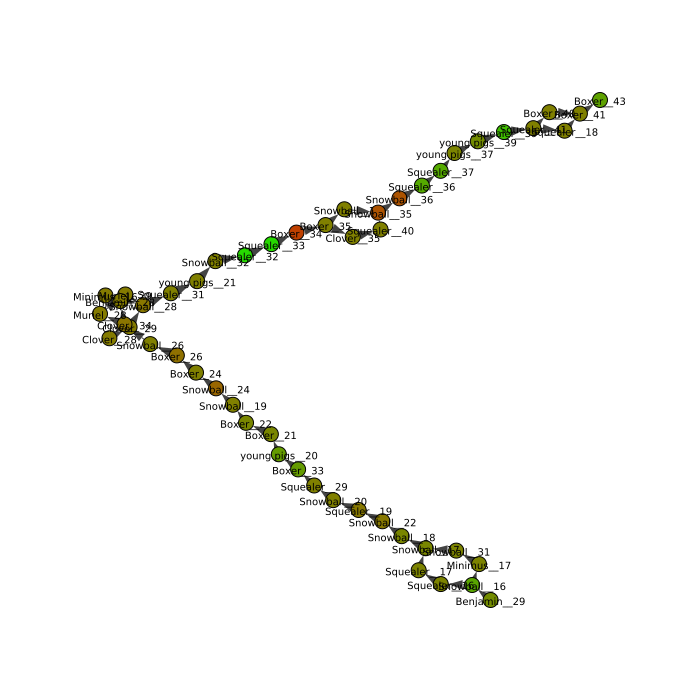

In [30]:
%autoreload 2
import igraph as ig

from tools import igraph_draw_traj
filname='S_out_graphs/Napoleon_graph.graphml'
# filname=filename1  #'S_out_graphs/Agnes Grey_graph.graphml'
# print pold
# npold={'-'.join(k.split('__')) : v for k,v in pold.items()}
# print npold
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

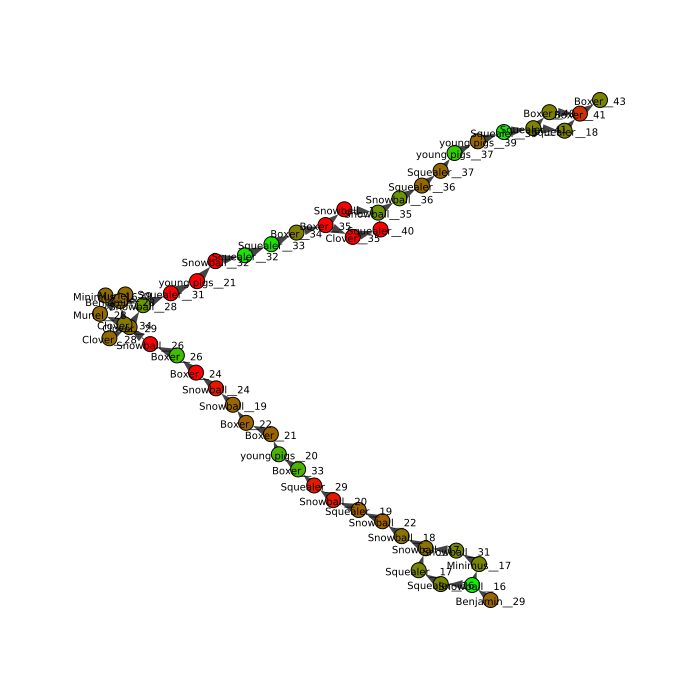

In [31]:
g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False,layout=layout)

ig.plot(g,  **visual_style)